**классификатор изображений MPL**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils 

In [2]:
np.random.seed(1671)

In [3]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
NB_CLASSES = len(set(y_train))
# NB_CLASSES

In [5]:
# normalize 
X_train = X_train/255.0
X_test = X_test/255.0

RESHAPED = 784

# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, RESHAPED).astype('float32')
X_test = X_test.reshape(10000, RESHAPED).astype('float32')

In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, NB_CLASSES)
Y_test = utils.to_categorical(y_test, NB_CLASSES)

In [8]:
# Y_train
# y_train

---

In [9]:
N_HIDDEN = 128
DROPOUT = 0.7

In [10]:
# model = Sequential()
# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('softmax'))

In [11]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
__________

---

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
# network and training
NB_EPOCH = 100
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [14]:
%%time 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
48000/48000 [==============================] - 4s 82us/sample - loss: 1.7559 - acc: 0.4482 - val_loss: 0.9709 - val_acc: 0.8145
Epoch 2/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.9611 - acc: 0.7096 - val_loss: 0.5478 - val_acc: 0.8725
Epoch 3/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.7108 - acc: 0.7844 - val_loss: 0.4256 - val_acc: 0.8910
Epoch 4/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5975 - acc: 0.8219 - val_loss: 0.3698 - val_acc: 0.9007
Epoch 5/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.5328 - acc: 0.8412 - val_loss: 0.3361 - val_acc: 0.9072
Epoch 6/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.4899 - acc: 0.8554 - val_loss: 0.3157 - val_acc: 0.9103
Epoch 7/200
48000/48000 [==============================] - 1s 

48000/48000 [==============================] - 1s 20us/sample - loss: 0.1671 - acc: 0.9502 - val_loss: 0.1210 - val_acc: 0.9645
Epoch 58/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1691 - acc: 0.9510 - val_loss: 0.1204 - val_acc: 0.9654
Epoch 59/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1658 - acc: 0.9504 - val_loss: 0.1193 - val_acc: 0.9653
Epoch 60/200
48000/48000 [==============================] - 1s 19us/sample - loss: 0.1651 - acc: 0.9504 - val_loss: 0.1190 - val_acc: 0.9656
Epoch 61/200
48000/48000 [==============================] - 1s 19us/sample - loss: 0.1624 - acc: 0.9516 - val_loss: 0.1180 - val_acc: 0.9656
Epoch 62/200
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1612 - acc: 0.9522 - val_loss: 0.1172 - val_acc: 0.9662
Epoch 63/200
48000/48000 [==============================] - 1s 19us/sample - loss: 0.1603 - acc: 0.9530 - val_loss: 0.1163 - val_acc: 0.9662
Epoch 64/200
48000/48000 [

48000/48000 [==============================] - 1s 22us/sample - loss: 0.1107 - acc: 0.9670 - val_loss: 0.0957 - val_acc: 0.9727
Epoch 116/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1110 - acc: 0.9676 - val_loss: 0.0948 - val_acc: 0.9723
Epoch 117/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1111 - acc: 0.9673 - val_loss: 0.0949 - val_acc: 0.9728
Epoch 118/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1093 - acc: 0.9671 - val_loss: 0.0945 - val_acc: 0.9731
Epoch 119/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1084 - acc: 0.9680 - val_loss: 0.0946 - val_acc: 0.9729
Epoch 120/200
48000/48000 [==============================] - 1s 23us/sample - loss: 0.1098 - acc: 0.9674 - val_loss: 0.0940 - val_acc: 0.9727
Epoch 121/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1054 - acc: 0.9688 - val_loss: 0.0937 - val_acc: 0.9729
Epoch 122/200
48000/

Epoch 173/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0840 - acc: 0.9740 - val_loss: 0.0867 - val_acc: 0.9749
Epoch 174/200
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0832 - acc: 0.9743 - val_loss: 0.0863 - val_acc: 0.9746
Epoch 175/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0842 - acc: 0.9741 - val_loss: 0.0860 - val_acc: 0.9752
Epoch 176/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0843 - acc: 0.9738 - val_loss: 0.0861 - val_acc: 0.9753
Epoch 177/200
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0837 - acc: 0.9739 - val_loss: 0.0861 - val_acc: 0.9748
Epoch 178/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0849 - acc: 0.9737 - val_loss: 0.0858 - val_acc: 0.9749
Epoch 179/200
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0824 - acc: 0.9742 - val_loss: 0.0859 - val_acc: 0.9752
Epoch 

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0743 - acc: 0.9769

Test score: 0.07430553717612057
Test accuracy: 0.9769


---

In [16]:
import matplotlib.pyplot as plt

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

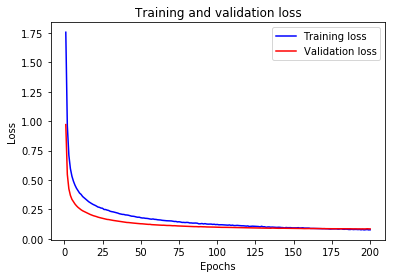

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

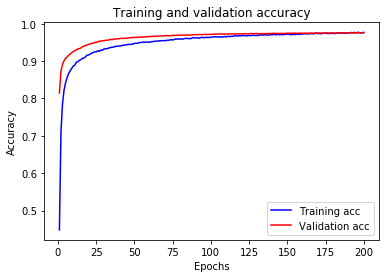

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

In [21]:
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5']]
default GPU device: /device:GPU:0
